In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import rasterio
from osgeo import gdal
from tifffile import imsave
%matplotlib inline
import cv2
path = os.getcwd()


path

'C:\\Users\\Quint\\Documents\\EPA\\Thesis\\ENC_Py3_mra-main\\enrichment_final\\ENC_Py3_mra-main_2\\MMR\\ENC_Py3_mra-main'

In [4]:
#path2 = r"C:\Users\Quint\Documents\EPA\Thesis\ENC_Py3_mra-main\amsterdam_metronamica-main\raster_comparison\mmr_rasters\mmr_rasters_12_7"

import rasterio as rio
path_1996 = r'EU_data\\mmr_2\\mmr_landuse_1996_final.tif'
with rio.open(path_1996) as dem_src:
    lu_MMR_1996 = dem_src.read(1)


In [5]:
luc_land=gdal.Open(path_1996)
projection_land = luc_land.GetProjection()
geotransform_land = luc_land.GetGeoTransform()

In [6]:
path_2016 = r'EU_data/mmr_2/mmr_landuse_2016_final.tif'

with rio.open(path_2016) as dem_src:
    lu_MMR_2016 = dem_src.read(1)

In [7]:
lu_MMR_1996

array([[11, 11, 11, ..., 11, 11, 11],
       [11, 11, 11, ..., 11, 11, 11],
       [11, 11, 11, ..., 11, 11, 11],
       ...,
       [11, 11, 11, ..., 11, 11, 11],
       [11, 11, 11, ..., 11, 11, 11],
       [11, 11, 11, ..., 11, 11, 11]], dtype=uint8)

# 1996 and 2016

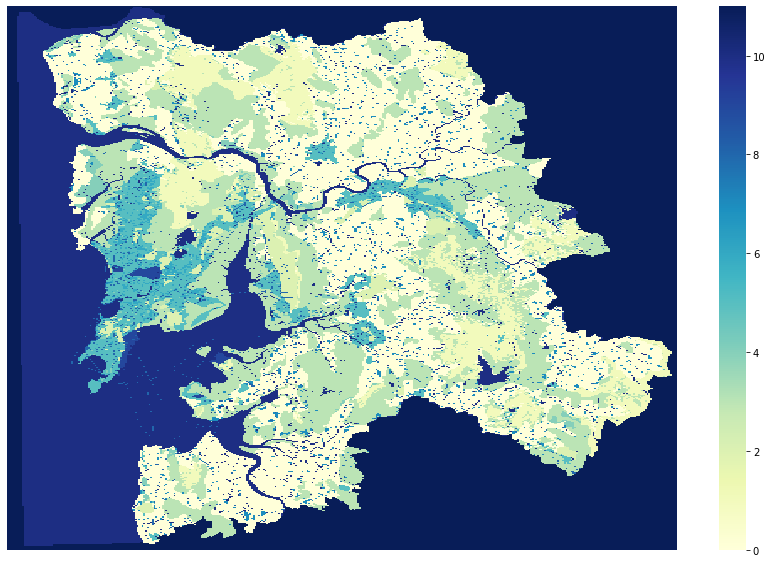

In [46]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(lu_MMR_1996, cmap="YlGnBu")
ax.set_axis_off()

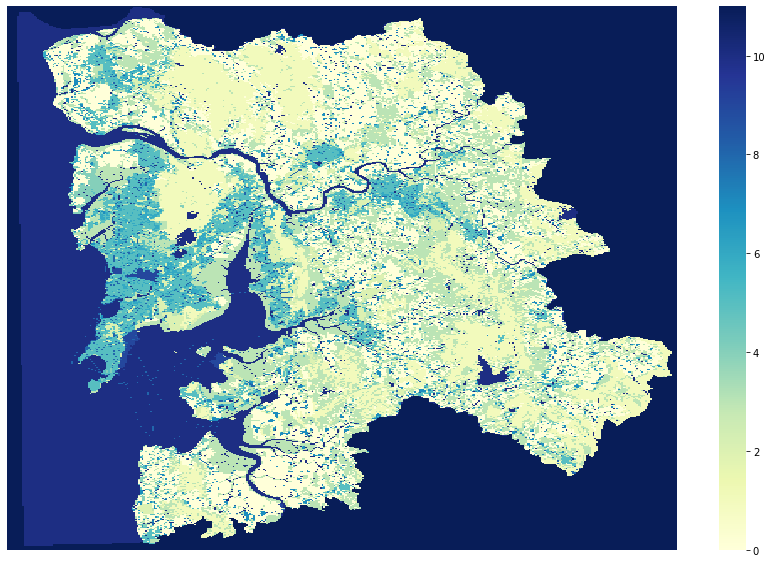

In [47]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(lu_MMR_2016, cmap="YlGnBu")
ax.set_axis_off()

(array([52912.,  2865., 32584.,  1234.,  7722.,  1098.,  2265.,  1961.,
          421., 98326.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

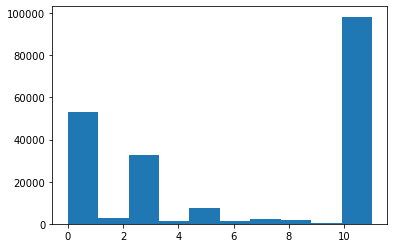

In [7]:
import numpy as np
a= np.array(lu_MMR_1996.reshape(-1,1))
plt.hist(a)

(array([52702.,  3546., 27478.,  1099., 11436.,  2076.,  2447.,  1893.,
          413., 98298.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

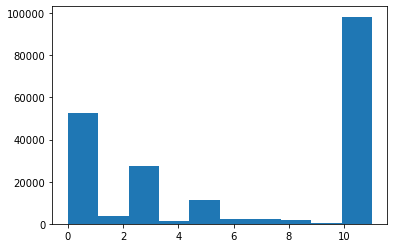

In [8]:
import numpy as np
a= np.array(lu_MMR_2016.reshape(-1,1))
plt.hist(a)

In [9]:
def select_land_use_class_1996(lu_map,lu_class,lu_map_1996_class):
    lu_map_1996_class = lu_map.copy()
    for i in range(lu_map_1996_class.shape[0]):
        for j in range(lu_map_1996_class.shape[1]):
            if (lu_map_1996_class[i][j] == 11):
                lu_map_1996_class[i][j] = 11
            elif (lu_map_1996_class[i][j] == 10):
                lu_map_1996_class[i][j] = 10
            elif lu_map_1996_class[i][j] == lu_class:
                lu_map_1996_class[i][j] = 1
            else: 
                lu_map_1996_class[i][j] = 12 
    return lu_map_1996_class

In [10]:
lu_map_1996_0={}
lu_map_1996_0=select_land_use_class_1996(lu_MMR_1996, 0, lu_map_1996_0)
lu_map_1996_1={}
lu_map_1996_1=select_land_use_class_1996(lu_MMR_1996, 1, lu_map_1996_1)
lu_map_1996_2={}
lu_map_1996_2=select_land_use_class_1996(lu_MMR_1996, 2, lu_map_1996_2)
lu_map_1996_3={}
lu_map_1996_3=select_land_use_class_1996(lu_MMR_1996, 3, lu_map_1996_3)
lu_map_1996_4={}
lu_map_1996_4=select_land_use_class_1996(lu_MMR_1996, 4, lu_map_1996_4)
lu_map_1996_5={}
lu_map_1996_5=select_land_use_class_1996(lu_MMR_1996, 5, lu_map_1996_5)
lu_map_1996_6={}
lu_map_1996_6=select_land_use_class_1996(lu_MMR_1996, 6, lu_map_1996_6)
lu_map_1996_7={}
lu_map_1996_7=select_land_use_class_1996(lu_MMR_1996, 7, lu_map_1996_7)
lu_map_1996_8={}
lu_map_1996_8=select_land_use_class_1996(lu_MMR_1996, 8, lu_map_1996_8)
lu_map_1996_9={}
lu_map_1996_9=select_land_use_class_1996(lu_MMR_1996, 9, lu_map_1996_9)
lu_map_1996_10={}
lu_map_1996_10=select_land_use_class_1996(lu_MMR_1996, 10, lu_map_1996_10)
lu_map_1996_11={}
lu_map_1996_11=select_land_use_class_1996(lu_MMR_1996, 11, lu_map_1996_11)


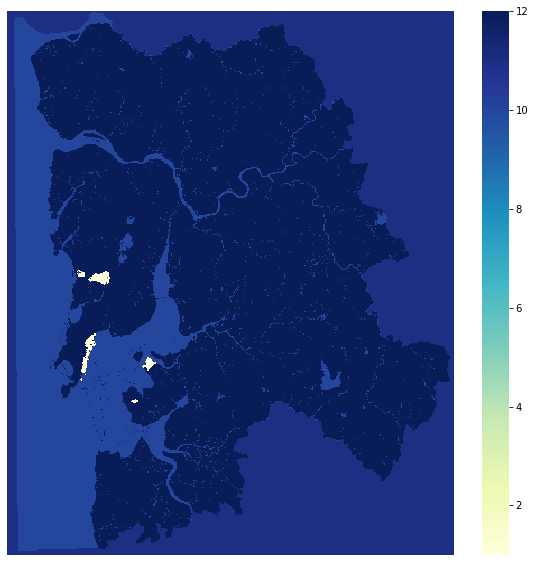

In [11]:
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(lu_map_1996_9, cmap="YlGnBu")
ax.set_axis_off()

In [12]:
unique, counts = np.unique(lu_MMR_2016, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[    0 32505]
 [    1 20197]
 [    2  3546]
 [    3 27478]
 [    4  1099]
 [    5 11436]
 [    6  2076]
 [    7  2447]
 [    8  1893]
 [    9   413]
 [   10 34872]
 [   11 63426]]


In [13]:
def select_land_use_class_2016(lu_map,lu_class,lu_map_2016_class):
    lu_map_2016_class = lu_map.copy()
    for i in range(lu_map_2016_class.shape[0]):
        for j in range(lu_map_2016_class.shape[1]):
            if (lu_map_2016_class[i][j] == 11):
                lu_map_2016_class[i][j] = 11
            elif (lu_map_2016_class[i][j] == 10):
                lu_map_2016_class[i][j] = 10
            elif (lu_map_2016_class[i][j] == lu_class):
                lu_map_2016_class[i][j] = 1
            else: 
                lu_map_2016_class[i][j] = 12 
    return lu_map_2016_class

In [14]:
lu_map_2016_0={}
lu_map_2016_0=select_land_use_class_2016(lu_MMR_2016, 0, lu_map_2016_0)
lu_map_2016_1={}
lu_map_2016_1=select_land_use_class_2016(lu_MMR_2016, 1, lu_map_2016_1)
lu_map_2016_2={}
lu_map_2016_2=select_land_use_class_2016(lu_MMR_2016, 2, lu_map_2016_2)
lu_map_2016_3={}
lu_map_2016_3=select_land_use_class_2016(lu_MMR_2016, 3, lu_map_2016_3)
lu_map_2016_4={}
lu_map_2016_4=select_land_use_class_2016(lu_MMR_2016, 4, lu_map_2016_4)
lu_map_2016_5={}
lu_map_2016_5=select_land_use_class_2016(lu_MMR_2016, 5, lu_map_2016_5)
lu_map_2016_6={}
lu_map_2016_6=select_land_use_class_2016(lu_MMR_2016, 6, lu_map_2016_6)
lu_map_2016_7={}
lu_map_2016_7=select_land_use_class_2016(lu_MMR_2016, 7, lu_map_2016_7)
lu_map_2016_8={}
lu_map_2016_8=select_land_use_class_2016(lu_MMR_2016, 8, lu_map_2016_8)
lu_map_2016_9={}
lu_map_2016_9=select_land_use_class_2016(lu_MMR_2016, 9, lu_map_2016_9)
lu_map_2016_10={}
lu_map_2016_10=select_land_use_class_2016(lu_MMR_2016, 10, lu_map_2016_10)
lu_map_2016_11={}
lu_map_2016_11=select_land_use_class_2016(lu_MMR_2016, 11, lu_map_2016_11)

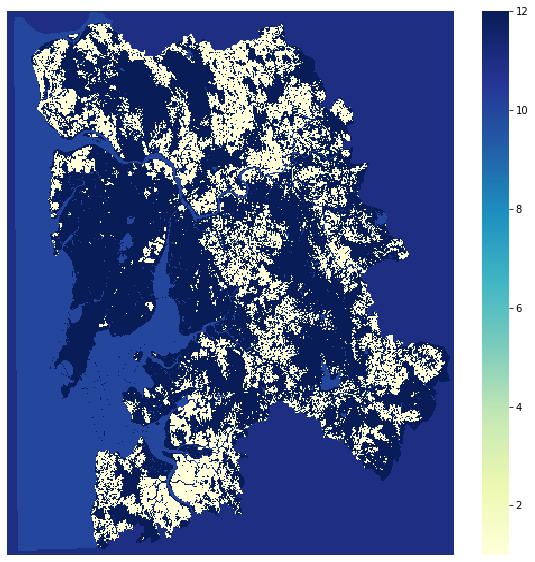

In [15]:
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(lu_map_2016_0, cmap="YlGnBu")
ax.set_axis_off()

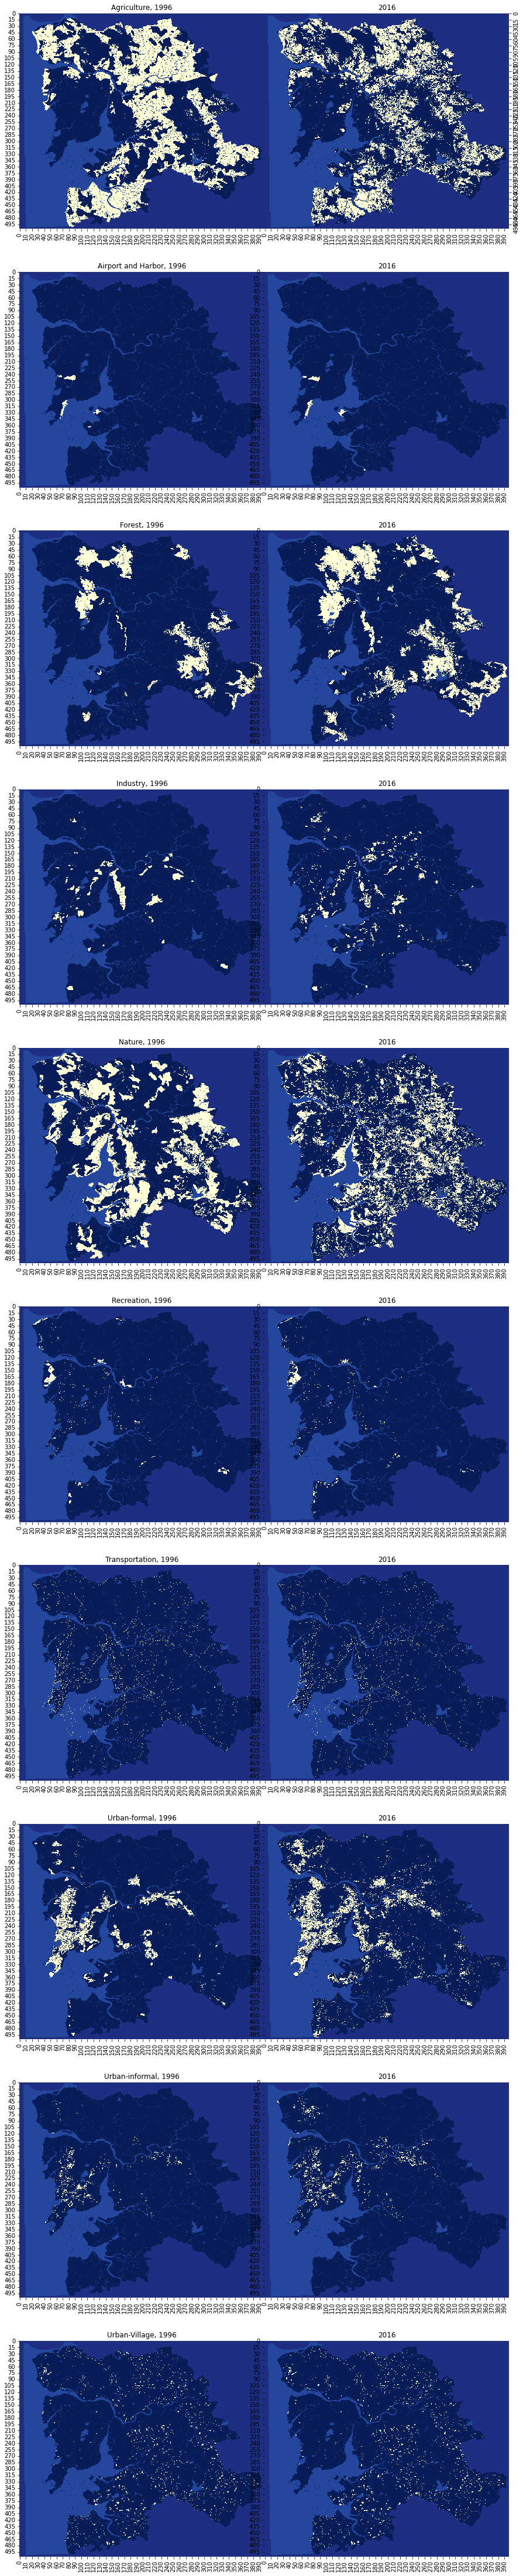

In [16]:
plt.rcParams["figure.figsize"] = [20, 16]

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16), (ax17, ax18), (ax19, ax20)) = plt.subplots(10, 2, figsize=(15,80))
fig.subplots_adjust(wspace=0.01)
sns.heatmap(lu_map_1996_0, cmap="YlGnBu", ax=ax1, cbar=False)
sns.heatmap(lu_map_2016_0, cmap="YlGnBu", ax=ax2, cbar=False)
ax1.set_title("Agriculture, 1996")
ax2.set_title("2016")
sns.heatmap(lu_map_1996_9, cmap="YlGnBu", ax=ax3, cbar=False)
sns.heatmap(lu_map_2016_9, cmap="YlGnBu", ax=ax4, cbar=False)
ax3.set_title("Airport and Harbor, 1996")
ax4.set_title("2016")
sns.heatmap(lu_map_1996_1, cmap="YlGnBu", ax=ax5, cbar=False)
sns.heatmap(lu_map_2016_1, cmap="YlGnBu", ax=ax6, cbar=False)
ax5.set_title("Forest, 1996")
ax6.set_title("2016")
sns.heatmap(lu_map_1996_2, cmap="YlGnBu", ax=ax7, cbar=False)
sns.heatmap(lu_map_2016_2, cmap="YlGnBu", ax=ax8, cbar=False)
ax7.set_title("Industry, 1996")
ax8.set_title("2016")
sns.heatmap(lu_map_1996_3, cmap="YlGnBu", ax=ax9, cbar=False)
sns.heatmap(lu_map_2016_3, cmap="YlGnBu", ax=ax10, cbar=False)
ax9.set_title("Nature, 1996")
ax10.set_title("2016")
sns.heatmap(lu_map_1996_4, cmap="YlGnBu", ax=ax11, cbar=False)
sns.heatmap(lu_map_2016_4, cmap="YlGnBu", ax=ax12, cbar=False)
ax11.set_title("Recreation, 1996")
ax12.set_title("2016")
sns.heatmap(lu_map_1996_8, cmap="YlGnBu", ax=ax13, cbar=False)
sns.heatmap(lu_map_2016_8, cmap="YlGnBu", ax=ax14, cbar=False)
ax13.set_title("Transportation, 1996")
ax14.set_title("2016")
sns.heatmap(lu_map_1996_5, cmap="YlGnBu", ax=ax15, cbar=False)
sns.heatmap(lu_map_2016_5, cmap="YlGnBu", ax=ax16, cbar=False)
ax15.set_title("Urban-formal, 1996")
ax16.set_title("2016")
sns.heatmap(lu_map_1996_6, cmap="YlGnBu", ax=ax17, cbar=False)
sns.heatmap(lu_map_2016_6, cmap="YlGnBu", ax=ax18, cbar=False)
ax17.set_title("Urban-informal, 1996")
ax18.set_title("2016")
sns.heatmap(lu_map_1996_7, cmap="YlGnBu", ax=ax19, cbar=False)
sns.heatmap(lu_map_2016_7, cmap="YlGnBu", ax=ax20, cbar=False)
ax19.set_title("Urban-Village, 1996")
ax20.set_title("2016")
ax2.yaxis.tick_right()
fig.subplots_adjust(wspace=0.001)
plt.show()


In [17]:
fig.savefig('pictures\\luc_1996_2016.png')

# 1996 and 2016

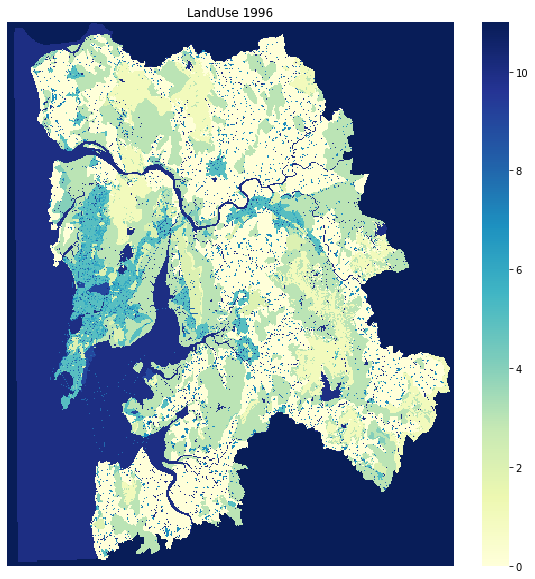

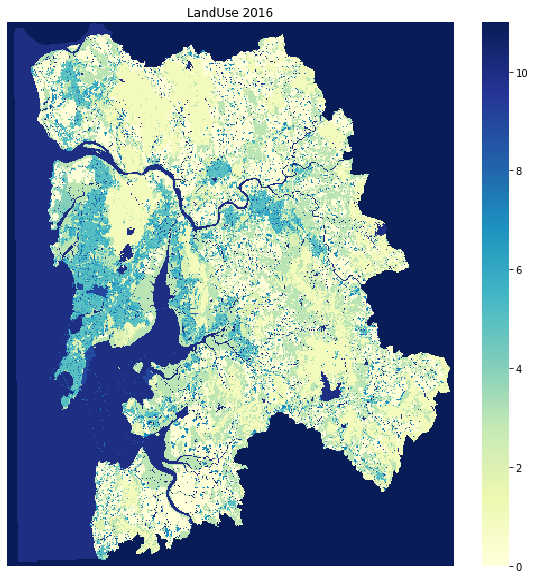

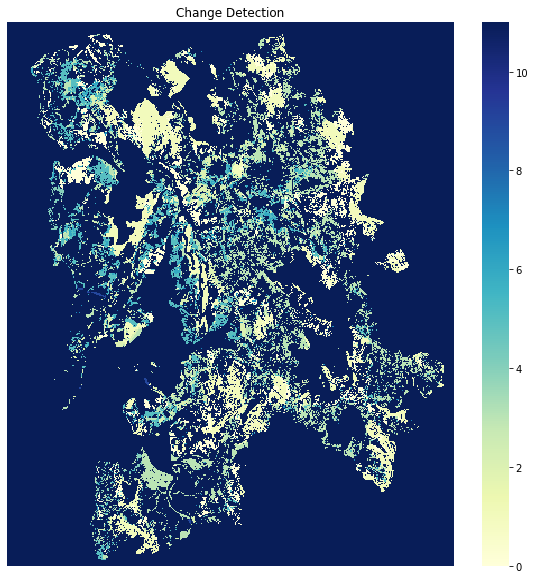

In [8]:
import rasterio as rio
    
#view
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(lu_MMR_1996, cmap="YlGnBu")
ax.set_title('LandUse 1996')
ax.set_axis_off()

fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(lu_MMR_2016, cmap="YlGnBu")
ax.set_title('LandUse 2016')
ax.set_axis_off()

#plot changes
## plotting changes
## for every cell in 2006, compare with adjacent cell in 1996. if they are the same, the corresponding cell in the change detection array = 0. if there is change, then 1. in the change part, have a dictionary where you note down 1996 landuse class as key and as the value, hold the changed value in 2010. 
change_detection_array = np.zeros((len(lu_MMR_2016),len(lu_MMR_2016[1])))

change_dict = {}

for i in range(lu_MMR_2016.shape[0]):
    for j in range(lu_MMR_2016.shape[1]):
        if lu_MMR_2016[i][j] == lu_MMR_1996[i][j]:
            change_detection_array[i][j]=11
        else:
            change_detection_array[i][j]=lu_MMR_2016[i][j]


#visualize changes
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(change_detection_array, cmap="YlGnBu")
ax.set_title('Change Detection')
ax.set_axis_off()

In [9]:
np.unique(change_detection_array)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10., 11.])

In [10]:
outputPath=r'EU_data/mmr_2/nieuwe/change_detection.tif'

In [11]:
cv2.imwrite(outputPath, change_detection_array)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform_land)
dataset2.SetProjection(projection_land)

AttributeError: 'NoneType' object has no attribute 'SetGeoTransform'

In [13]:
(unique,counts) = np.unique(lu_MMR_1996,return_counts= True)
frequencies1996 = np.asarray((unique,counts)).T


(unique1,counts1) = np.unique(lu_MMR_2016,return_counts= True)
frequencies2016 = np.asarray((unique1,counts1)).T

print(frequencies1996), print(frequencies2016)

op = pd.DataFrame()
categs = []
val1996=[]
val2016=[]
for i in range(len(frequencies1996)):
    categs.append(int(frequencies1996[i][0]))
    val1996.append(int(frequencies1996[i][1]))
    
for i in range(len(frequencies2016)):
    val2016.append(int(frequencies2016[i][1]))
#val2006.append(0)

diffs = []
for i in range(len(val1996)):
    diffs.append(val2016[i]-val1996[i])
op['categories'] = categs
op['1996']=val1996
op['2016']=val2016
op['difference'] = diffs

category_map = {0.0: 'Agriculture',1.0: 'Forest',2.0: 'Industry',3.0:'Nature',4.0:'Recreation',5.0:'Urban-formal',6.0:'Urban-informal',7.0:'Urban-villages',8.0:'Transportation',9.0:'Airport and Harbour',10.0: 'Water',11.0:'Outside'}


op['categories']=op['categories'].astype('float')
op['categories']=op['categories'].map(category_map)

op




[[    0 42076]
 [    1 10836]
 [    2  2865]
 [    3 32584]
 [    4  1234]
 [    5  7722]
 [    6  1098]
 [    7  2265]
 [    8  1961]
 [    9   421]
 [   10 34900]
 [   11 63426]]
[[    0 32505]
 [    1 20197]
 [    2  3546]
 [    3 27478]
 [    4  1099]
 [    5 11436]
 [    6  2076]
 [    7  2447]
 [    8  1893]
 [    9   413]
 [   10 34872]
 [   11 63426]]


,categories,1996,2016,difference
0,Agriculture,42076,32505,-9571
1,Forest,10836,20197,9361
2,Industry,2865,3546,681
3,Nature,32584,27478,-5106
4,Recreation,1234,1099,-135
5,Urban-formal,7722,11436,3714
6,Urban-informal,1098,2076,978
7,Urban-villages,2265,2447,182
8,Transportation,1961,1893,-68
9,Airport and Harbour,421,413,-8


FileNotFoundError: [Errno 2] No such file or directory: 'pictures\\transition_table.png'

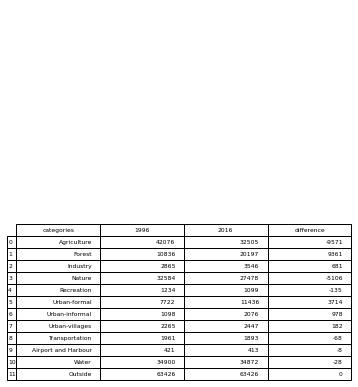

In [14]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
import pandas as pd
from pandas.plotting import table 
table(ax, op)  # where df is your data frame

plt.savefig('pictures\\transition_table.png')

FileNotFoundError: [Errno 2] No such file or directory: 'pictures\\contingency_table.png'

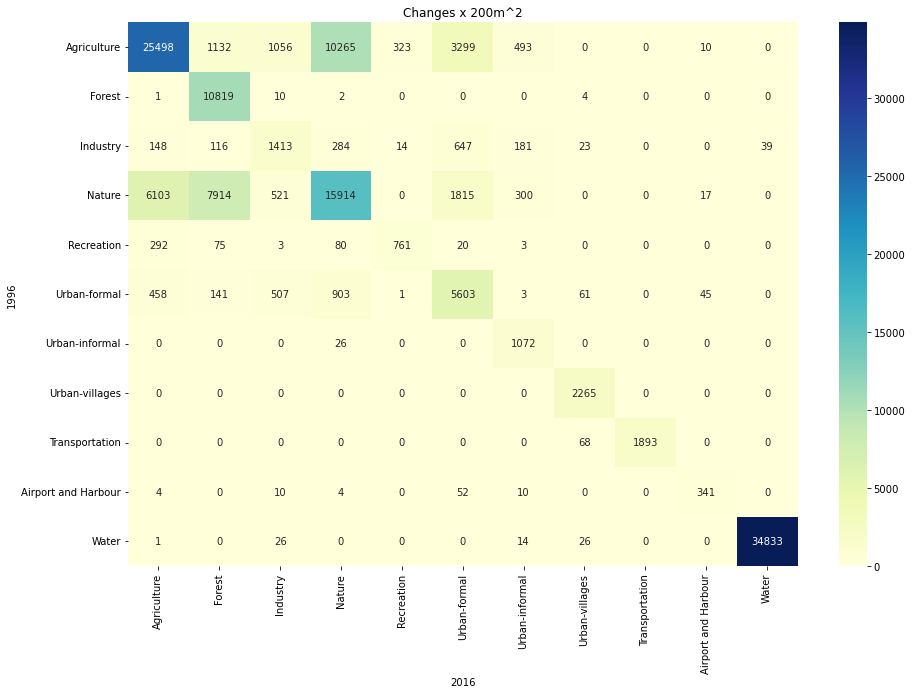

In [15]:
# change detection

for i in range(change_detection_array.shape[0]):
    for j in range(change_detection_array.shape[1]):
        change_dict[(i,j)]=(lu_MMR_1996[i][j],lu_MMR_2016[i][j])
        

changes=[]
change_count={}
for i in list(change_dict.values()):
    if i not in changes:
        changes.append(i)
        change_count[(i[0],i[1])]=1
    else:
        change_count[(i[0],i[1])]+=1

#change_count


categs_names = {}
for i in range(len(changes)):
    categs_names[str(changes[i])] = category_map[changes[i][0]] + ' to ' +  category_map[changes[i][1]]

#print(categs_names)

#now combine categs names with change_count 
categ_names_counts = {}
for change in list(change_count.keys()):
    categ_names_counts[categs_names[str(change)]] = change_count[change]
    
#categ_names_counts

changes=[]
change_count={}
for i in list(change_dict.values()):
    if i not in changes:
        changes.append(i)
        change_count[(i[0],i[1])]=1
    else:
        change_count[(i[0],i[1])]+=1

#change_count.keys()

change_heatmap = np.zeros((11,11))
for i in range(11):
    for j in range(11):
        try:
            change_heatmap[i][j] = int(change_count[(float(i),float(j))])
        except:
            change_heatmap[i][j] = 0 
#change_heatmap[0][0] = 0

#change_heatmap
fig,ax = plt.subplots(figsize=(15,10))
x_axis_labels = np.array(list(category_map.values())) # labels for x-axis
y_axis_labels = np.array(list(category_map.values())) # labels for y-axis
x_axis_labels=x_axis_labels[:-1]
y_axis_labels=y_axis_labels[:-1]
ax = sns.heatmap(change_heatmap, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap="YlGnBu", annot=True,fmt='g')
ax.set_title('Changes x 200m^2')
plt.xlabel('2016')
plt.ylabel('1996')
#ax.set_axis_off()
plt.savefig('pictures\\contingency_table.png')

In [16]:
change_heatmap

array([[2.5498e+04, 1.1320e+03, 1.0560e+03, 1.0265e+04, 3.2300e+02,
        3.2990e+03, 4.9300e+02, 0.0000e+00, 0.0000e+00, 1.0000e+01,
        0.0000e+00],
       [1.0000e+00, 1.0819e+04, 1.0000e+01, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.4800e+02, 1.1600e+02, 1.4130e+03, 2.8400e+02, 1.4000e+01,
        6.4700e+02, 1.8100e+02, 2.3000e+01, 0.0000e+00, 0.0000e+00,
        3.9000e+01],
       [6.1030e+03, 7.9140e+03, 5.2100e+02, 1.5914e+04, 0.0000e+00,
        1.8150e+03, 3.0000e+02, 0.0000e+00, 0.0000e+00, 1.7000e+01,
        0.0000e+00],
       [2.9200e+02, 7.5000e+01, 3.0000e+00, 8.0000e+01, 7.6100e+02,
        2.0000e+01, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.5800e+02, 1.4100e+02, 5.0700e+02, 9.0300e+02, 1.0000e+00,
        5.6030e+03, 3.0000e+00, 6.1000e+01, 0.0000e+00, 4.5000e+01,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 2.6000e+01, 0.

In [17]:
sum(change_heatmap[:,3])

27478.0

In [18]:
agri=(list(change_heatmap[0])/sum(change_heatmap[0]))*100
forest=list(change_heatmap[1])/sum(change_heatmap[1])*100
indus=list(change_heatmap[2])/sum(change_heatmap[2])*100
nature=list(change_heatmap[3])/sum(change_heatmap[3])*100
recreation=list(change_heatmap[4])/sum(change_heatmap[4])*100
urbanform=list(change_heatmap[5])/sum(change_heatmap[5])*100
urbaninf=list(change_heatmap[6])/sum(change_heatmap[6])*100
urbanvil=list(change_heatmap[7])/sum(change_heatmap[7])*100
transp=list(change_heatmap[8])/sum(change_heatmap[8])*100
airport=list(change_heatmap[9])/sum(change_heatmap[9])*100
water=list(change_heatmap[10])/sum(change_heatmap[10])*100
df2=pd.DataFrame()
df2['agriculture,1996']=agri
df2['forest']=forest
df2['industry']=indus
df2['nature']=nature
df2['recreation']=recreation
df2['urban-formal']=urbanform
df2['urban-informal']=urbaninf
df2['urban-village']=urbanvil
df2['transport']=transp
df2['airport and harbour']=airport
df2['water']=water
df2.index=["Agriculture 2016", "Forest", "Industry",
             "Nature", "Recreation", "Urban-formal",
             "Urban-informal", "Urban-villages", "Transport", "Airport and Harbour",
             "Water"]

columns=1996, index=2016
The diagonal are the intertias

In [19]:
df2

,"agriculture,1996",forest,industry,nature,recreation,urban-formal,urban-informal,urban-village,transport,airport and harbour,water
Agriculture 2016,60.599867,0.009228,5.165794,18.730052,23.662885,5.931106,0.000000,0.0,0.000000,0.950119,0.002865
Forest,2.690370,99.843116,4.048866,24.287994,6.077796,1.825952,0.000000,0.0,0.000000,0.000000,0.000000
Industry,2.509744,0.092285,49.319372,1.598944,0.243112,6.565657,0.000000,0.0,0.000000,2.375297,0.074499
Nature,24.396330,0.018457,9.912740,48.839921,6.482982,11.693862,2.367942,0.0,0.000000,0.950119,0.000000
Recreation,0.767659,0.000000,0.488656,0.000000,61.669368,0.012950,0.000000,0.0,0.000000,0.000000,0.000000
Urban-formal,7.840574,0.000000,22.582897,5.570219,1.620746,72.558923,0.000000,0.0,0.000000,12.351544,0.000000
Urban-informal,1.171689,0.000000,6.317627,0.920697,0.243112,0.038850,97.632058,0.0,0.000000,2.375297,0.040115
Urban-villages,0.000000,0.036914,0.802792,0.000000,0.000000,0.789951,0.000000,100.0,3.467619,0.000000,0.074499
Transport,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,96.532381,0.000000,0.000000
Airport and Harbour,0.023767,0.000000,0.000000,0.052173,0.000000,0.582751,0.000000,0.0,0.000000,80.997625,0.000000


In [20]:
change_heatmap

array([[2.5498e+04, 1.1320e+03, 1.0560e+03, 1.0265e+04, 3.2300e+02,
        3.2990e+03, 4.9300e+02, 0.0000e+00, 0.0000e+00, 1.0000e+01,
        0.0000e+00],
       [1.0000e+00, 1.0819e+04, 1.0000e+01, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.4800e+02, 1.1600e+02, 1.4130e+03, 2.8400e+02, 1.4000e+01,
        6.4700e+02, 1.8100e+02, 2.3000e+01, 0.0000e+00, 0.0000e+00,
        3.9000e+01],
       [6.1030e+03, 7.9140e+03, 5.2100e+02, 1.5914e+04, 0.0000e+00,
        1.8150e+03, 3.0000e+02, 0.0000e+00, 0.0000e+00, 1.7000e+01,
        0.0000e+00],
       [2.9200e+02, 7.5000e+01, 3.0000e+00, 8.0000e+01, 7.6100e+02,
        2.0000e+01, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.5800e+02, 1.4100e+02, 5.0700e+02, 9.0300e+02, 1.0000e+00,
        5.6030e+03, 3.0000e+00, 6.1000e+01, 0.0000e+00, 4.5000e+01,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 2.6000e+01, 0.

In [22]:
conversion_points = np.zeros((11,11))
for i in range(11):
    for j in range(11):
        try:
            conversion_points[i][j]=(change_heatmap[i][j]/(sum(change_heatmap[:,j])-change_heatmap[j,j]))
        except:
            conversion_points[i][j] = 0   

<ipython-input-22-4bd5854ed6a2>:5: RuntimeWarning: invalid value encountered in double_scalars
  conversion_points[i][j]=(change_heatmap[i][j]/(sum(change_heatmap[:,j])-change_heatmap[j,j]))
<ipython-input-22-4bd5854ed6a2>:5: RuntimeWarning: divide by zero encountered in double_scalars
  conversion_points[i][j]=(change_heatmap[i][j]/(sum(change_heatmap[:,j])-change_heatmap[j,j]))


In [23]:
conversion_points

array([[3.63893250e+00, 1.20708040e-01, 4.95077356e-01, 8.87668627e-01,
        9.55621302e-01, 5.65575176e-01, 4.91035857e-01, 0.00000000e+00,
                   nan, 1.38888889e-01, 0.00000000e+00],
       [1.42714428e-04, 1.15365750e+00, 4.68823254e-03, 1.72950536e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.19780220e-02,
                   nan, 0.00000000e+00, 0.00000000e+00],
       [2.11217354e-02, 1.23693751e-02, 6.62447257e-01, 2.45589761e-02,
        4.14201183e-02, 1.10920624e-01, 1.80278884e-01, 1.26373626e-01,
                   nan, 0.00000000e+00, 1.00000000e+00],
       [8.70986157e-01, 8.43889955e-01, 2.44256915e-01, 1.37616742e+00,
        0.00000000e+00, 3.11160638e-01, 2.98804781e-01, 0.00000000e+00,
                   nan, 2.36111111e-01, 0.00000000e+00],
       [4.16726131e-02, 7.99744082e-03, 1.40646976e-03, 6.91802145e-03,
        2.25147929e+00, 3.42876736e-03, 2.98804781e-03, 0.00000000e+00,
                   nan, 0.00000000e+00, 0.00000000e+

In [24]:
sum(change_heatmap[:,3])

27478.0

In [25]:
conversion_points

array([[3.63893250e+00, 1.20708040e-01, 4.95077356e-01, 8.87668627e-01,
        9.55621302e-01, 5.65575176e-01, 4.91035857e-01, 0.00000000e+00,
                   nan, 1.38888889e-01, 0.00000000e+00],
       [1.42714428e-04, 1.15365750e+00, 4.68823254e-03, 1.72950536e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.19780220e-02,
                   nan, 0.00000000e+00, 0.00000000e+00],
       [2.11217354e-02, 1.23693751e-02, 6.62447257e-01, 2.45589761e-02,
        4.14201183e-02, 1.10920624e-01, 1.80278884e-01, 1.26373626e-01,
                   nan, 0.00000000e+00, 1.00000000e+00],
       [8.70986157e-01, 8.43889955e-01, 2.44256915e-01, 1.37616742e+00,
        0.00000000e+00, 3.11160638e-01, 2.98804781e-01, 0.00000000e+00,
                   nan, 2.36111111e-01, 0.00000000e+00],
       [4.16726131e-02, 7.99744082e-03, 1.40646976e-03, 6.91802145e-03,
        2.25147929e+00, 3.42876736e-03, 2.98804781e-03, 0.00000000e+00,
                   nan, 0.00000000e+00, 0.00000000e+

Text(114.0, 0.5, '1996')

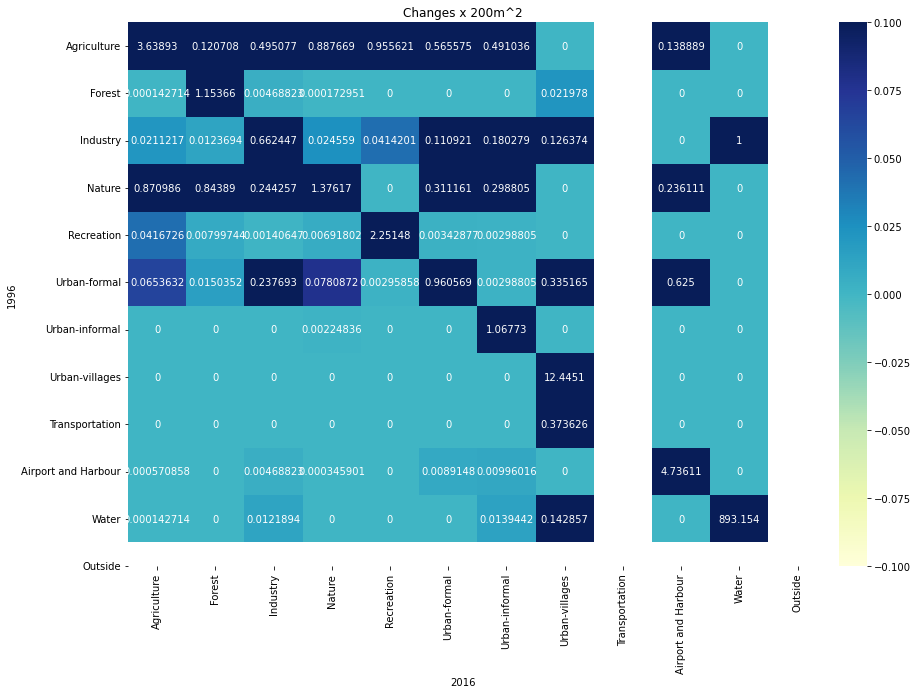

In [30]:
#change_heatmap
fig,ax = plt.subplots(figsize=(15,10))
x_axis_labels = np.array(list(category_map.values())) # labels for x-axis
y_axis_labels = np.array(list(category_map.values())) # labels for y-axis

ax = sns.heatmap(conversion_points, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap="YlGnBu", annot=True,fmt='g')
ax.set_title('Changes x 200m^2')
plt.xlabel('2016')
plt.ylabel('1996')

In [66]:
cp2=conversion_points.flatten()
cp2=np.nan_to_num(cp2)
my_formatted_list = [ '%.2f' % elem for elem in cp2]
float_lst = [float(item) for item in my_formatted_list]


In [71]:
histogramlist=[x for x in float_lst if x <= 1]

(array([80.,  4.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
         2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  1.]),
 array([0.        , 0.01030928, 0.02061856, 0.03092784, 0.04123711,
        0.05154639, 0.06185567, 0.07216495, 0.08247423, 0.09278351,
        0.10309278, 0.11340206, 0.12371134, 0.13402062, 0.1443299 ,
        0.15463918, 0.16494845, 0.17525773, 0.18556701, 0.19587629,
        0.20618557, 0.21649485, 0.22680412, 0.2371134 , 0.24742268,
        0.25773196, 0.26804124, 0.27835052, 0.28865979, 0.29896907,
        0.30927835, 0.31958763, 0.3298969

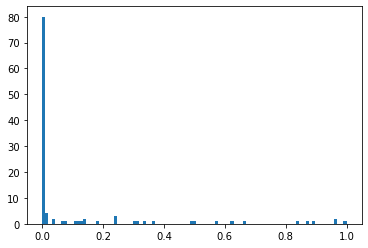

In [73]:
plt.hist(histogramlist,bins='auto')

In [51]:
agri=list(change_heatmap[:,0])/(sum(change_heatmap[:,0]))
forest=list(change_heatmap[:,1])/sum(change_heatmap[:,1])
indus=list(change_heatmap[:,2])/sum(change_heatmap[:,2])
nature=list(change_heatmap[:,3])/sum(change_heatmap[:,3])
recreation=list(change_heatmap[:,4])/sum(change_heatmap[:,4])
urbanform=list(change_heatmap[:,5])/sum(change_heatmap[:,5])
urbaninf=list(change_heatmap[:,6])/sum(change_heatmap[:,6])
urbanvil=list(change_heatmap[:,7])/sum(change_heatmap[:,7])
transp=list(change_heatmap[:,8])/sum(change_heatmap[:,8])
airport=list(change_heatmap[:,9])/sum(change_heatmap[:,9])
water=list(change_heatmap[:,10])/sum(change_heatmap[:,10])

In [52]:
df=pd.DataFrame()
df['agriculture.2016']=agri
df['forest']=forest
df['industry']=indus
df['nature']=nature
df['recreation']=recreation
df['urban-formal']=urbanform
df['urban-informal']=urbaninf
df['urban-village']=urbanvil
df['transport']=transp
df['airport and harbour']=airport
df['water']=water
df.index=["Agriculture,1996", "Forest", "Industry",
             "Nature", "Recreation", "Urban-formal",
             "Urban-informal", "Urban-villages", "Transport", "Airport and Harbour",
             "Water"]

index=1996, columns=2016

In [53]:
df

,agriculture.2016,forest,industry,nature,recreation,urban-formal,urban-informal,urban-village,transport,airport and harbour,water
"Agriculture,1996",0.784433,0.056048,0.297800,0.373572,0.293904,0.288475,0.237476,0.000000,0.0,0.024213,0.000000
Forest,0.000031,0.535674,0.002820,0.000073,0.000000,0.000000,0.000000,0.001635,0.0,0.000000,0.000000
Industry,0.004553,0.005743,0.398477,0.010336,0.012739,0.056576,0.087187,0.009399,0.0,0.000000,0.001118
Nature,0.187756,0.391840,0.146926,0.579154,0.000000,0.158709,0.144509,0.000000,0.0,0.041162,0.000000
Recreation,0.008983,0.003713,0.000846,0.002911,0.692448,0.001749,0.001445,0.000000,0.0,0.000000,0.000000
Urban-formal,0.014090,0.006981,0.142978,0.032863,0.000910,0.489944,0.001445,0.024928,0.0,0.108959,0.000000
Urban-informal,0.000000,0.000000,0.000000,0.000946,0.000000,0.000000,0.516378,0.000000,0.0,0.000000,0.000000
Urban-villages,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.925623,0.0,0.000000,0.000000
Transport,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027789,1.0,0.000000,0.000000
Airport and Harbour,0.000123,0.000000,0.002820,0.000146,0.000000,0.004547,0.004817,0.000000,0.0,0.825666,0.000000


In [79]:
figure = ax.get_figure()   
figure.savefig('pictures\\matrix.png')

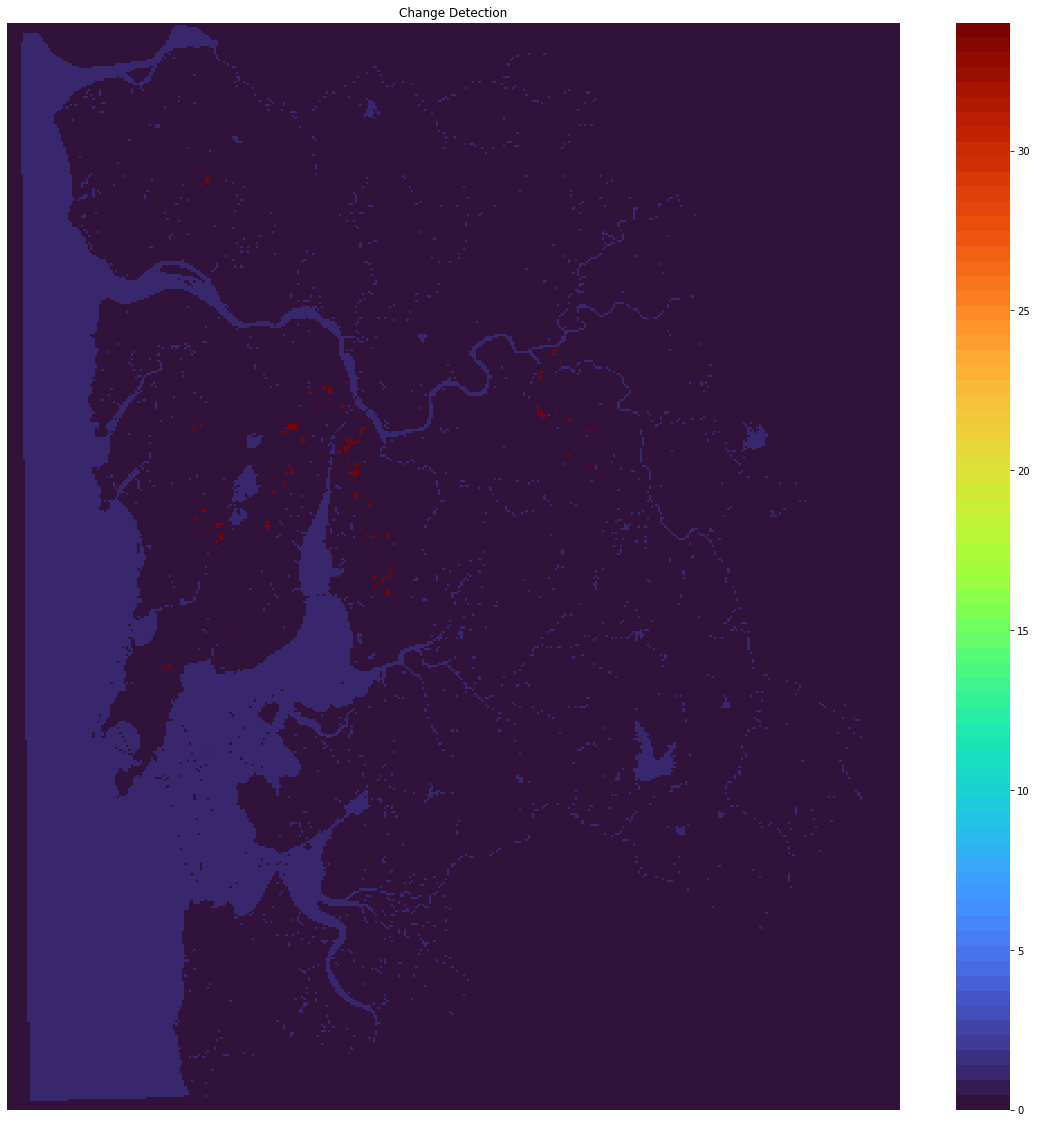

In [20]:
change_dict_with_categname = {}
for i in list(change_dict.keys()):
    #replace the change category with the name from categ_names
    change_dict_with_categname[str(i)] = categs_names[str(change_dict[i])]
    
    
array_list = list(categs_names.keys())
a={}
b={}
for i in range(len(array_list)):
    a[array_list[i]]=i
    b[i] = categs_names[array_list[i]]

#change_dict_with_categname

spatial_changedict = np.zeros((len(lu_MMR_2016),len(lu_MMR_2016[1])))
spatial_changedict2 = np.zeros((len(lu_MMR_2016),len(lu_MMR_2016[1])))

for i in range(len(lu_MMR_2016)):
    for j in range(len(lu_MMR_2016[1])):
        spatial_changedict[i][j] = a[str(change_dict[(i,j)])]

for i in range(len(lu_MMR_2016)):
    for j in range(len(lu_MMR_2016[1])):
        if  a[str(change_dict[(i,j)])] == 34 or a[str(change_dict[(i,j)])] == 1:
            spatial_changedict2[i][j] = a[str(change_dict[(i,j)])]
        else:
            spatial_changedict2[i][j] = 0
#spatial_changedict
# 35 , 30 
import seaborn as sns
import matplotlib as mpl
fig,ax = plt.subplots(figsize=(20,20))
ncols = 73
cmap = mpl.colors.ListedColormap(plt.cm.turbo(np.linspace(0, 1, ncols)))
#cmap.set_under((.8, .8, .8, 1.0))

ax = sns.heatmap(spatial_changedict2, cmap=cmap)
ax.set_title('Change Detection')
ax.set_axis_off()



In [120]:
b

{0: 'Outside to Outside',
 1: 'Water to Water',
 2: 'Agriculture to Nature',
 3: 'Nature to Nature',
 4: 'Nature to Agriculture',
 5: 'Agriculture to Forest',
 6: 'Agriculture to Urban-formal',
 7: 'Agriculture to Agriculture',
 8: 'Urban-villages to Urban-villages',
 9: 'Transportation to Transportation',
 10: 'Transportation to Urban-villages',
 11: 'Recreation to Recreation',
 12: 'Agriculture to Recreation',
 13: 'Agriculture to Industry',
 14: 'Nature to Forest',
 15: 'Recreation to Agriculture',
 16: 'Water to Urban-villages',
 17: 'Recreation to Urban-formal',
 18: 'Recreation to Nature',
 19: 'Nature to Urban-formal',
 20: 'Forest to Forest',
 21: 'Agriculture to Urban-informal',
 22: 'Nature to Urban-informal',
 23: 'Urban-formal to Urban-formal',
 24: 'Recreation to Forest',
 25: 'Urban-formal to Industry',
 26: 'Urban-formal to Nature',
 27: 'Nature to Industry',
 28: 'Urban-formal to Agriculture',
 29: 'Urban-informal to Urban-informal',
 30: 'Urban-formal to Forest',
 31: 

In [17]:
## conversion to raster

## converting array to raster 
from osgeo import gdal
from osgeo import gdal_array
from osgeo import osr

def array2raster(newRasterfn, dataset, array, dtype):
    """
    save GTiff file from numpy.array
    input:
        newRasterfn: save file name
        dataset : original tif file (lu1996)
        array : numpy.array  (spatial_changedict)
        dtype: Byte or Float32.
    """
    cols = array.shape[1]
    rows = array.shape[0]
    originX, pixelWidth, b, originY, d, pixelHeight = dataset.GetGeoTransform() 

    driver = gdal.GetDriverByName('GTiff')

    # set data type to save.
    GDT_dtype = gdal.GDT_Unknown
    if dtype == "Byte": 
        GDT_dtype = gdal.GDT_Byte
    elif dtype == "Float32":
        GDT_dtype = gdal.GDT_Float32
    else:
        print("Not supported data type.")

    # set number of band.
    if array.ndim == 2:
        band_num = 1
    else:
        band_num = array.shape[2]

    outRaster = driver.Create(newRasterfn, cols, rows, band_num, GDT_dtype)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))

    # Loop over all bands.
    for b in range(band_num):
        outband = outRaster.GetRasterBand(b + 1)
        # Read in the band's data into the third dimension of our array
        if band_num == 1:
            outband.WriteArray(array)
        else:
            outband.WriteArray(array[:,:,b])

    # setteing srs from input tif file.
    prj=dataset.GetProjection()
    outRasterSRS = osr.SpatialReference(wkt=prj)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache() 
    
    

dataset = gdal.Open(path_1996)
op = array2raster(path2+'spatialchange2.tif',dataset,spatial_changedict,'Float32')

NameError: name 'path2' is not defined

In [30]:
spatial_changedict[200,201]

6.0